In [ ]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 5: Life in Lower Dimensions

You are provided with a dataset of 1797 images - each image is 8x8 pixels and provided as a feature vector of length 64. You will try your hands at transforming this dataset to a lower-dimensional space using PCA, and perform K-means clustering the images in this reduced space.
 




In [ ]:
# Cell type : CodeWrite
# write the function for PCA and K-means clustering here. 

def PCA(M, D, X):
    X_bar = np.mean(X,axis = 0)[None, :]
    S = np.dot(X.T-X_bar.T, X-X_bar)/len(X)
    eigenvals, eigenvecs = np.linalg.eig(S)
    N = len(X)
    U = np.array(eigenvecs)
    Z = np.zeros((N,M))
    b = np.zeros(D)
    for n in range(N):
        for i in range(M):
            Z[n,i] = np.dot(X[n], U[: , i])
    for i in range(M,D):
        b[i] = np.dot(X_bar, U[: , i])
    
    X_tilde = np.zeros(X.shape)
    
    for n in range(N):
        for i in range(M):
            X_tilde[n, : ] += Z[n,i]*U[: , i].T
        for i in range(M,D):
            X_tilde[n, : ] += b[i]*U[: , i].T
    
    return (X_tilde)



**Cell type : TextRead**

# Problem 5

#### 5a) Run PCA algorithm on the given data-set. Plot the cumulative percentage variance explained by the principal components. Report the number of principal components that contribute to 90% of the variance in the dataset.




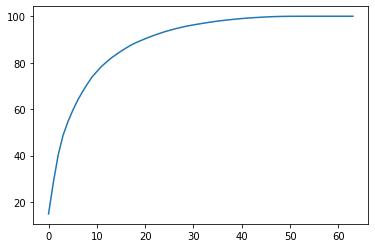

In [155]:
# Cell type : CodeWrite
# write the code for loading the data, running the PCA algorithm, and plotting. 
# (Use the functions written previously.)
datafile = np.load('Data.npz')
X = datafile['arr_0']
X_bar = np.mean(X,axis = 0)[None, :]
S = np.dot(X.T-X_bar.T, X-X_bar)/len(X)
eigenvals, eigenvecs = np.linalg.eig(S)
p=eigenvals
sum=0
np.sort(p)[::-1]
for i in range(len(p)):
    sum=sum+p[i]
    p[i]=sum
for j in range(len(p)):
    p[j]=p[j]/sum*100
plt.plot(p)


####5b)  Perform reconstruction of data using the dimensionality-reduced data considering the number of dimensions [2,4,8,16]. Report the Mean Square Error (MSE) between the original data and reconstructed data, and interpret the optimal dimensions $\hat{d}$ based on the MSE values.



[858.9447808487328, 616.1911300562693, 391.7947361149765, 180.93970325737862]


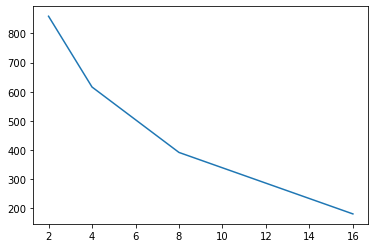

In [156]:
# Cell type : CodeWrite
# Write the code for data reconstruction, run the algorithm for dimensions.
import time
eigenvalslist=[]
mse=[]
y=[2,4,8,16]
for i in y:
    M=i
    D=64
    X_tilde=PCA(M, D, X)
    eigenvalslist.append(X_tilde)
    mean_square_error=np.sum((X-X_tilde)**2)/len(X)
    mse.append(mean_square_error)
    #time.sleep(2)
#print(myplots)
#fig, ax = plt.subplots(nrows=2, ncols=2)
#for eigen,mseval in zip(eigenvalslist,mse):
    #for row in ax:
        #for col in row:
            #col.plot(eigen)
            #col.title.set_text(mseval)
plt.plot(y,mse)
print(mse)



####5c) Apply K-means clustering on the reduced dataset from last subpart (b) (i.e., the $R^{64}$ to $R^\hat{d}$ reduced dataset; pick the initial k points as cluster centers during initialization). Report the optimal choice of K you have made from the set [1...15]. Which method did you choose to find the optimum number of clusters? And explain briefy why you chose that method. Also, show the 2D scatter plot (consider only the first two dimensions of optimal $\hat{d}$) of the datapoints based on the cluster predicted by K-means (use different color for each cluster).


In [157]:
# Cell type : CodeWrite
# Write the code for dimensionality reduction, run k-means algorithm on the reduced data-set and do plotting.

####5d) In the next TextWrite cell, Summarise and explain your observations from the above experiments. Is the PCA+K-means clustering consistent with how your brain would cluster the images?



**Cell type : TextWrite**

Report your observations, MSE values and the method used to choose the optimal number of clusters.

